# ASL Alphabet 
- The training data set contains 87,000 images which are 200x200 pixels.
- There are 29 classes, of which 26 are for the letters A-Z and 3 classes for SPACE, DELETE and NOTHING.
- These 3 classes are very helpful in real-time applications, and classification.


In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mping
import pathlib
import random

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Input, GlobalAveragePooling2D, AvgPool2D, Dropout, Activation
from tensorflow.keras import  Sequential
from tensorflow.keras.optimizers import  Adam

In [2]:
#upload data
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"thuynguyen246","key":"3f6ab4e0736a8c23216da495339ebe67"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/


In [4]:
!chmod 600 /root/.kaggle/kaggle.ison
!kaggle datasets download -d grassknoted/asl-alphabet

chmod: cannot access '/root/.kaggle/kaggle.ison': No such file or directory
 98% 1.01G/1.03G [00:36<00:00, 21.5MB/s]
100% 1.03G/1.03G [00:36<00:00, 30.0MB/s]


In [5]:
!unzip "/content/asl-alphabet.zip"

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing19.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing190.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1900.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1901.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1902.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1903.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1904.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1905.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1906.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1907.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1908.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1909.jpg  
  inflating: asl_alpha

In [6]:
# visualize 
import os
train_folder = '/content/asl_alphabet_train/asl_alphabet_train'
all_data = []
for folder in os.listdir(train_folder):
  label_folder = os.path.join(train_folder, folder)
  onlyfiles = [{'label':folder,'path':os.path.join(label_folder, f)} for f in os.listdir(label_folder) 
                  if os.path.isfile(os.path.join(label_folder, f))]
  all_data += onlyfiles


df = pd.DataFrame(all_data)
df


,label,path
0,Z,/content/asl_alphabet_train/asl_alphabet_train...
1,Z,/content/asl_alphabet_train/asl_alphabet_train...
2,Z,/content/asl_alphabet_train/asl_alphabet_train...
3,Z,/content/asl_alphabet_train/asl_alphabet_train...
4,Z,/content/asl_alphabet_train/asl_alphabet_train...
...,...,...
86995,Y,/content/asl_alphabet_train/asl_alphabet_train...
86996,Y,/content/asl_alphabet_train/asl_alphabet_train...
86997,Y,/content/asl_alphabet_train/asl_alphabet_train...
86998,Y,/content/asl_alphabet_train/asl_alphabet_train...


In [7]:
df.groupby(['label']).count()

,path
label,
A,3000
B,3000
C,3000
D,3000
E,3000
F,3000
G,3000
H,3000
I,3000


In [8]:
def viewRandomImage(target_dir,target_class):
  target_file = target_dir + target_class
  random_image = random.sample(os.listdir(target_file),1)
  img = mping.imread(target_file + '/' + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis(False)
  print(f'Image shape: {img.shape}')

Image shape: (200, 200, 3)


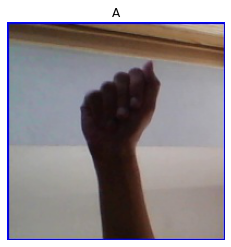

In [9]:
viewRandomImage(train_folder+'/','A')

Image shape: (200, 200, 3)


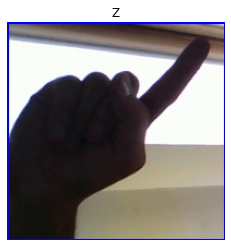

In [10]:
viewRandomImage(train_folder+'/','Z')

Image shape: (200, 200, 3)


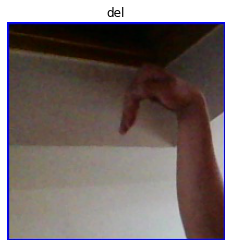

In [11]:
viewRandomImage(train_folder+'/','del')

In [12]:
data_dir = pathlib.Path('asl_alphabet_train/asl_alphabet_train')
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
class_names

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
       'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z',
       'del', 'nothing', 'space'], dtype='<U7')

In [13]:
from numpy.lib.utils import source
import shutil

rootdir = '/content/asl_alphabet_train/asl_alphabet_train/'
for i in class_names:
  os.makedirs(rootdir + '/train/' + i)
  os.makedirs(rootdir + '/test/'+ i)
  source = rootdir + '/' + i
  allFileNames = os.listdir(source)
  np.random.shuffle(allFileNames)

  train_size = 0.8
  train_FileNames, test_FileNames = np.split(np.array(allFileNames),[int(len(allFileNames)*train_size)])
  print(f'train: {train_FileNames} \n test:')
  train_FileNames = [source + '/' + name for name in train_FileNames.tolist()]
  test_FileNames = [source + '/' + name for name in test_FileNames.tolist()]

  for name in train_FileNames:
    shutil.copy(name, rootdir + '/train/' + i)

  for name in test_FileNames:
    shutil.copy(name, rootdir + '/test/' + i)



train: ['A1110.jpg' 'A1706.jpg' 'A2650.jpg' ... 'A2373.jpg' 'A2101.jpg'
 'A1357.jpg'] 
 test:
train: ['B555.jpg' 'B432.jpg' 'B720.jpg' ... 'B2627.jpg' 'B2263.jpg' 'B1739.jpg'] 
 test:
train: ['C1344.jpg' 'C200.jpg' 'C1850.jpg' ... 'C1549.jpg' 'C2991.jpg' 'C223.jpg'] 
 test:
train: ['D2142.jpg' 'D1188.jpg' 'D984.jpg' ... 'D2644.jpg' 'D75.jpg' 'D918.jpg'] 
 test:
train: ['E1427.jpg' 'E1377.jpg' 'E893.jpg' ... 'E581.jpg' 'E2578.jpg' 'E180.jpg'] 
 test:
train: ['F1209.jpg' 'F411.jpg' 'F512.jpg' ... 'F2277.jpg' 'F2555.jpg' 'F1475.jpg'] 
 test:
train: ['G2466.jpg' 'G1539.jpg' 'G1395.jpg' ... 'G2730.jpg' 'G2881.jpg'
 'G1444.jpg'] 
 test:
train: ['H1975.jpg' 'H411.jpg' 'H1722.jpg' ... 'H2745.jpg' 'H61.jpg' 'H2139.jpg'] 
 test:
train: ['I2689.jpg' 'I1788.jpg' 'I1308.jpg' ... 'I2261.jpg' 'I2518.jpg'
 'I2609.jpg'] 
 test:
train: ['J198.jpg' 'J60.jpg' 'J1582.jpg' ... 'J2670.jpg' 'J2775.jpg' 'J2952.jpg'] 
 test:
train: ['K2534.jpg' 'K1433.jpg' 'K946.jpg' ... 'K139.jpg' 'K1102.jpg' 'K1978.jpg'] 
 te

In [14]:
train_dir = '/content/asl_alphabet_train/asl_alphabet_train/train'
test_dir = '/content/asl_alphabet_train/asl_alphabet_train/test'

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_data = train_datagen.flow_from_directory(train_dir, 
                                              target_size = (244, 244),
                                              batch_size = 64,
                                              seed = 42)
test_data = test_datagen.flow_from_directory(test_dir, 
                                              target_size = (244, 244),
                                              batch_size = 64,
                                              seed = 42)


Found 69600 images belonging to 29 classes.
Found 17400 images belonging to 29 classes.


# create model


In [15]:
def fire_module(x, s1, e1, e3):

    s1x = Conv2D(s1, kernel_size= 1, padding = 'same')(x)
    s1x = tf.keras.layers.ReLU()(s1x)

    e1x = Conv2D(e1, kernel_size= 1, padding= 'same')(s1x)
    e3x = Conv2D(e3, kernel_size= 3, padding= 'same')(s1x)
    
    x = tf.keras.layers.concatenate([e1x, e3x])
    x = tf.keras.layers.ReLU()(x)
    return x

In [16]:
def SqueezeNet(input_shape, nclasses):

    input = Input(input_shape)
    x = Conv2D(96,kernel_size=(7,7),strides=(2,2),padding='same')(input)
    x = MaxPool2D(pool_size=(3,3), strides = (2,2))(x)
    x = fire_module(x, s1 = 16, e1 = 64, e3 = 64) #2
    x = fire_module(x, s1 = 16, e1 = 64, e3 = 64) #3
    x = fire_module(x, s1 = 32, e1 = 128, e3 = 128) #4
    x = MaxPool2D(pool_size=(3,3), strides = (2,2))(x)
    x = fire_module(x, s1 = 32, e1 = 128, e3 = 128) #5
    x = fire_module(x, s1 = 48, e1 = 192, e3 = 192) #6
    x = fire_module(x, s1 = 48, e1 = 192, e3 = 192) #7
    x = fire_module(x, s1 = 64, e1 = 256, e3 = 256) #8
    x = MaxPool2D(pool_size=(3,3), strides = (2,2))(x)
    x = fire_module(x, s1 = 64, e1 = 256, e3 = 256) #9
    x = Dropout(0.5)(x)
    x = Conv2D(nclasses,kernel_size = 1)(x)
    x = GlobalAveragePooling2D()(x)

    output = Activation('softmax', name='loss')(x)
    model = tf.keras.Model(input, output)
    
    return model

In [17]:
model = SqueezeNet(input_shape=(224,224,3), nclasses=29)

In [18]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 112, 112, 96  14208       ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 55, 55, 96)   0           ['conv2d[0][0]']                 
                                                                                              

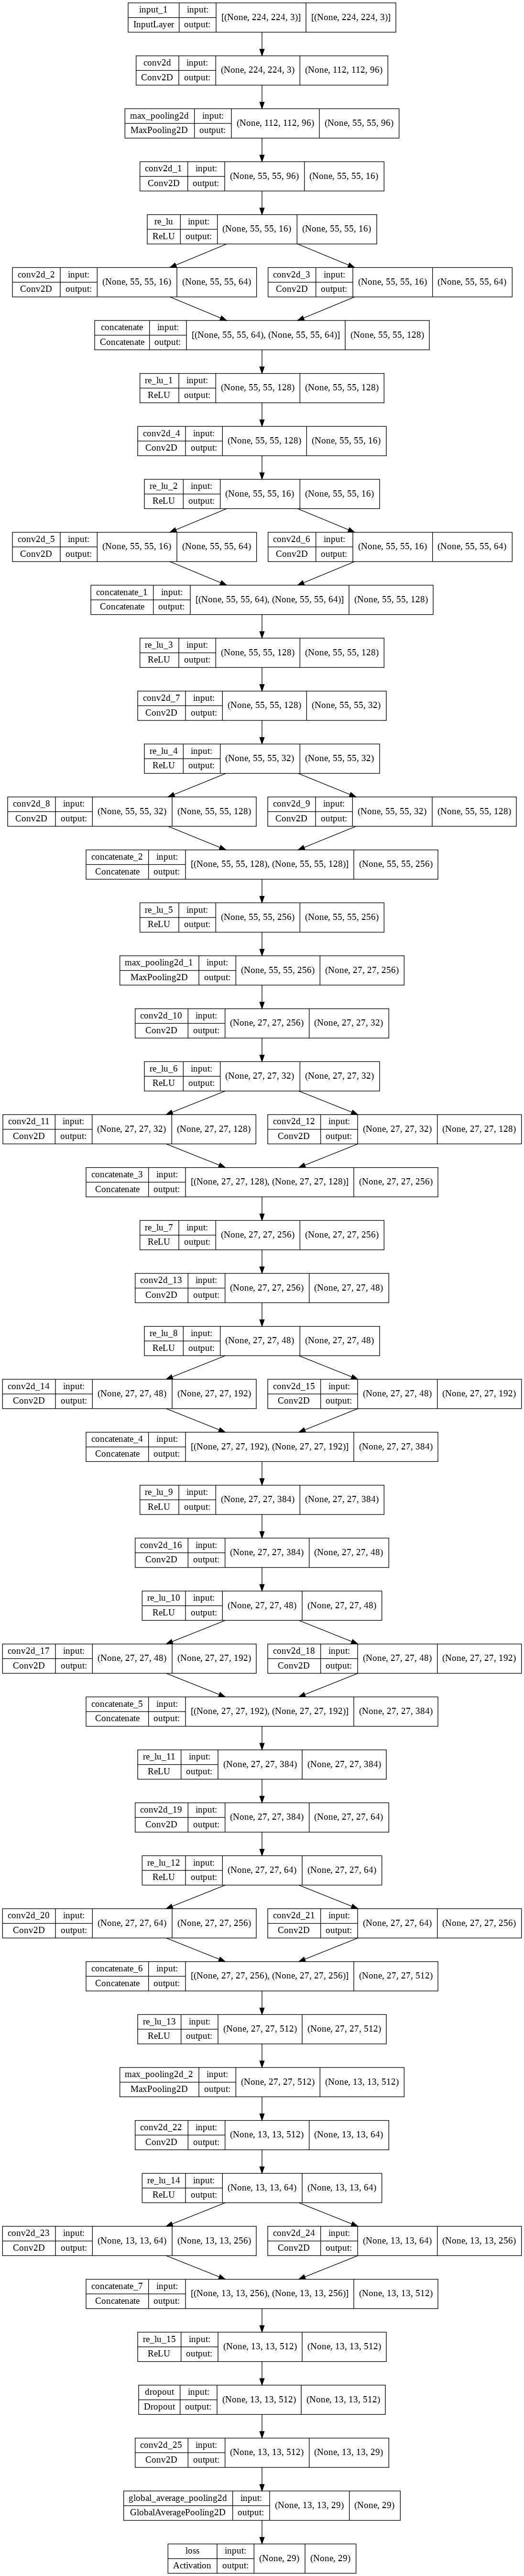

In [19]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [20]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = tf.keras.optimizers.RMSprop(lr=0.0001, decay=1e-6),
    metrics = ['accuracy']
)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [21]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=2)


In [22]:
history = model.fit(train_data, epochs=10, validation_data=test_data, callbacks= early_stop)

Epoch 1/10
1088/1088 [==============================] - 541s 481ms/step - loss: 3.1895 - accuracy: 0.0894 - val_loss: 2.8850 - val_accuracy: 0.1660
Epoch 2/10
1088/1088 [==============================] - 521s 478ms/step - loss: 2.0285 - accuracy: 0.3829 - val_loss: 1.2582 - val_accuracy: 0.6314
Epoch 3/10
1088/1088 [==============================] - 521s 478ms/step - loss: 1.0196 - accuracy: 0.6772 - val_loss: 1.0677 - val_accuracy: 0.6866
Epoch 4/10
1088/1088 [==============================] - 520s 478ms/step - loss: 0.5513 - accuracy: 0.8237 - val_loss: 0.3635 - val_accuracy: 0.8933
Epoch 5/10
1088/1088 [==============================] - 520s 478ms/step - loss: 0.3259 - accuracy: 0.8949 - val_loss: 0.1309 - val_accuracy: 0.9623
Epoch 6/10
1088/1088 [==============================] - 520s 478ms/step - loss: 0.2010 - accuracy: 0.9356 - val_loss: 0.1033 - val_accuracy: 0.9671
Epoch 7/10
1088/1088 [==============================] - 519s 477ms/step - loss: 0.1363 - accuracy: 0.9558 - val_

In [23]:
#evalute model

model.evaluate(test_data)

272/272 [==============================] - 45s 164ms/step - loss: 0.0222 - accuracy: 0.9935


[0.022202085703611374, 0.9935057759284973]

In [24]:
loss = history.history['loss']
val_loss = history.history['val_loss']

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

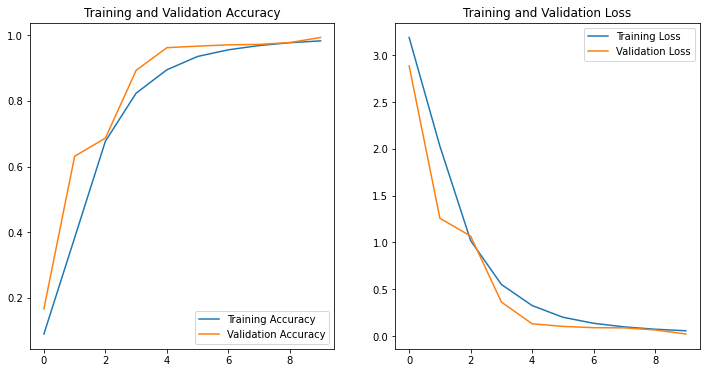

In [25]:
epochs_range = range(10)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [28]:
model.save_weights('my_checkpoint')

In [29]:
model.save('my_model.h5')

In [31]:
from google.colab import files
uploaded = files.upload()
for k, v in uploaded.items():
    open(k, 'wb').write(v)

Saving Screenshot 2022-04-14 162236.png to Screenshot 2022-04-14 162236.png


In [32]:
new_model = tf.keras.models.load_model('my_model.h5')

In [33]:
new_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 112, 112, 96  14208       ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 55, 55, 96)   0           ['conv2d[0][0]']                 
                                                                                              

In [34]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [67]:
import cv2
img = cv2.imread('/content/asl_alphabet_test/asl_alphabet_test/C_test.jpg')

In [62]:
from google.colab.patches import cv2_imshow

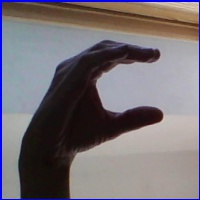

In [68]:
cv2_imshow(img)

In [63]:
img.shape

(1, 224, 224, 3)

In [ ]:
img = cv2.resize(img,(224,224))  
img = np.reshape(img,[1,224,224,3]) 
img.shape

In [65]:
hehe = model.predict(img)
hehe 

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],
      dtype=float32)

In [66]:
class_names[np.argmax(hehe[0])]

'A'

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(test_data[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[test_data[i]])
  
plt.show()